In [175]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [176]:
# Importing dataset

df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


### Data Study

In [177]:
df.shape

(10683, 11)

In [178]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Getting basic Info about our dataset

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [180]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Analysing dataset using automatation method "Pandas profiling"

import pandas_profiling as pp

Report = pp.ProfileReport(df)
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from "Report"

1. __Jet Airways__ is the Airline with maximum number of flights
2. Maximum number of flights are taking off from 'Delhi'
3. Maximum number of flights are landing at 'Cochin'
4. Most flights have only 1 stop
5. Additional column has maximum number of Null values. We can drop this column.
6. Maximum Price of a flight is Rs. 79512 and minimum price is Rs. 1759

##  Exploratory Data Analysis (EDA)

In [182]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### Merging different Classes of same airline together

In [183]:
df.replace('Jet Airways Business','Jet Airways', inplace=True)
df.replace('Vistara Premium economy','Vistara', inplace=True)
df.replace('Multiple carriers Premium economy','Multiple carriers', inplace=True)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [184]:
# Getting updated counts of Airlines

df.Airline.value_counts()

Airline
Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: count, dtype: int64

In [185]:
df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

### Merging same places in Destination column

In [186]:
df.replace('New Delhi', 'Delhi', inplace =True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [187]:
# Updated counts of Destinations

df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

### Dropping "Route" column, being non-significant & "Additional_Info" col, due to high count of null values.

In [188]:
df = df.drop(['Route','Additional_Info'], axis = 1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302


In [189]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [190]:
# Dropping rows with at least one null value

df.dropna(subset = 'Total_Stops', inplace =True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302


In [191]:
# Resetting Index after dropping rows with null values

df.reset_index(drop=True, inplace= True)

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302


In [192]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [193]:
# We can observe that Journey dates are of "Object" data type & there is inconsistency in dates format

# Making formats of Journey dates consistent and converting them into "datetime" datatype

df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey, dayfirst = True)

df.Date_of_Journey.unique()

<DatetimeArray>
['2019-03-24 00:00:00', '2019-05-01 00:00:00', '2019-06-09 00:00:00',
 '2019-05-12 00:00:00', '2019-03-01 00:00:00', '2019-06-24 00:00:00',
 '2019-03-12 00:00:00', '2019-05-27 00:00:00', '2019-06-01 00:00:00',
 '2019-04-18 00:00:00', '2019-05-09 00:00:00', '2019-04-24 00:00:00',
 '2019-03-03 00:00:00', '2019-04-15 00:00:00', '2019-06-12 00:00:00',
 '2019-03-06 00:00:00', '2019-03-21 00:00:00', '2019-04-03 00:00:00',
 '2019-05-06 00:00:00', '2019-05-15 00:00:00', '2019-06-18 00:00:00',
 '2019-06-15 00:00:00', '2019-04-06 00:00:00', '2019-05-18 00:00:00',
 '2019-06-27 00:00:00', '2019-05-21 00:00:00', '2019-06-03 00:00:00',
 '2019-03-15 00:00:00', '2019-05-03 00:00:00', '2019-03-09 00:00:00',
 '2019-06-06 00:00:00', '2019-05-24 00:00:00', '2019-04-01 00:00:00',
 '2019-04-21 00:00:00', '2019-06-21 00:00:00', '2019-03-27 00:00:00',
 '2019-03-18 00:00:00', '2019-04-12 00:00:00', '2019-04-09 00:00:00',
 '2019-04-27 00:00:00']
Length: 40, dtype: datetime64[ns]

In [194]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Price                       int64
dtype: object

### Extracting out Date, day & Week from _"Date of Journey"_ Column

In [195]:
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Day'] = df['Date_of_Journey'].dt.day_name()
df['Journey_Month'] = df['Date_of_Journey'].dt.month_name(locale = 'English')
df['Journey_Week'] = df['Date_of_Journey'].dt.isocalendar().week

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,Sunday,March,12
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,Wednesday,May,18
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,Sunday,June,23
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,Sunday,May,19
4,IndiGo,2019-03-01,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,Friday,March,9


### Extracting out _"hours"_ & _"minutes"_ from "Departure_Time" and "Arrival_Time" Columns

In [196]:
# Converting the Departure time column from "object" data type to "datetime" data type

df.Dep_Time = pd.to_datetime(df['Dep_Time'])

df['Dep_Time_hours'] = df['Dep_Time'].dt.hour
df['Dep_Time_min'] = df['Dep_Time'].dt.minute

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-07-16 22:20:00,01:10 22 Mar,2h 50m,non-stop,3897,24,Sunday,March,12,22,20
1,Air India,2019-05-01,Kolkata,Banglore,2024-07-16 05:50:00,13:15,7h 25m,2 stops,7662,1,Wednesday,May,18,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,2024-07-16 09:25:00,04:25 10 Jun,19h,2 stops,13882,9,Sunday,June,23,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,2024-07-16 18:05:00,23:30,5h 25m,1 stop,6218,12,Sunday,May,19,18,5
4,IndiGo,2019-03-01,Banglore,Delhi,2024-07-16 16:50:00,21:35,4h 45m,1 stop,13302,1,Friday,March,9,16,50


In [197]:
df.Arrival_Time = pd.to_datetime(df['Arrival_Time'])

df['Arrival_Time_hours'] = df['Arrival_Time'].dt.hour
df['Arrival_Time_min'] = df['Arrival_Time'].dt.minute

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-07-16 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,3897,24,Sunday,March,12,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,2024-07-16 05:50:00,2024-07-16 13:15:00,7h 25m,2 stops,7662,1,Wednesday,May,18,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,2024-07-16 09:25:00,2024-06-10 04:25:00,19h,2 stops,13882,9,Sunday,June,23,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,2024-07-16 18:05:00,2024-07-16 23:30:00,5h 25m,1 stop,6218,12,Sunday,May,19,18,5,23,30
4,IndiGo,2019-03-01,Banglore,Delhi,2024-07-16 16:50:00,2024-07-16 21:35:00,4h 45m,1 stop,13302,1,Friday,March,9,16,50,21,35


### Converting Total_stops into numbers

In [198]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [199]:
df.Total_Stops.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

df.Total_Stops.astype(int)

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-07-16 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,2024-07-16 05:50:00,2024-07-16 13:15:00,7h 25m,2,7662,1,Wednesday,May,18,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,2024-07-16 09:25:00,2024-06-10 04:25:00,19h,2,13882,9,Sunday,June,23,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,2024-07-16 18:05:00,2024-07-16 23:30:00,5h 25m,1,6218,12,Sunday,May,19,18,5,23,30
4,IndiGo,2019-03-01,Banglore,Delhi,2024-07-16 16:50:00,2024-07-16 21:35:00,4h 45m,1,13302,1,Friday,March,9,16,50,21,35


### Making the Duration data consistent by converting them in total hours

In [200]:
df.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [201]:
df.Duration = pd.to_timedelta(df.Duration).apply(lambda x : x.total_seconds())/3600
df[['Duration']].head()

,Duration
0,2.833333
1,7.416667
2,19.000000
3,5.416667
4,4.750000


In [202]:
df[['Duration']].head().round(2)

,Duration
0,2.83
1,7.42
2,19.00
3,5.42
4,4.75


In [203]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-07-16 22:20:00,2024-03-22 01:10:00,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,2024-07-16 05:50:00,2024-07-16 13:15:00,7.416667,2,7662,1,Wednesday,May,18,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,2024-07-16 09:25:00,2024-06-10 04:25:00,19.000000,2,13882,9,Sunday,June,23,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,2024-07-16 18:05:00,2024-07-16 23:30:00,5.416667,1,6218,12,Sunday,May,19,18,5,23,30
4,IndiGo,2019-03-01,Banglore,Delhi,2024-07-16 16:50:00,2024-07-16 21:35:00,4.750000,1,13302,1,Friday,March,9,16,50,21,35


In [204]:
# Removing not required columns now - Date_of_Journey, Dep_Time, Arrival_Time

df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis =1, inplace =True)

df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,Banglore,Delhi,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,Kolkata,Banglore,7.416667,2,7662,1,Wednesday,May,18,5,50,13,15
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,9,Sunday,June,23,9,25,4,25
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,12,Sunday,May,19,18,5,23,30
4,IndiGo,Banglore,Delhi,4.750000,1,13302,1,Friday,March,9,16,50,21,35


## Visualization

### 1. Univariate Analysis

### Number of flights for each source & Destination

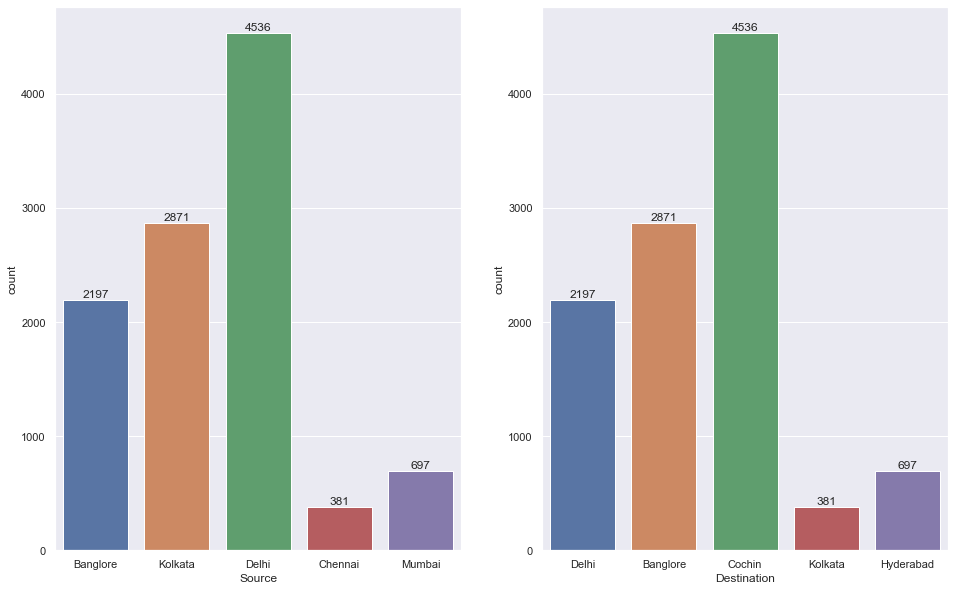

In [44]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
a = sns.countplot(df['Source'])

for i in a.containers:
    a.bar_label(i)

plt.subplot(1,2,2)
b = sns.countplot(df['Destination'])

for i in b.containers:
    b.bar_label(i)
plt.show()

In [45]:
# Observations -

# 1. Maximum flights (= 4536) are taking off from Delhi
# 1. Maximum flights (= 4536) are landing at Cochin

<function matplotlib.pyplot.show(close=None, block=None)>

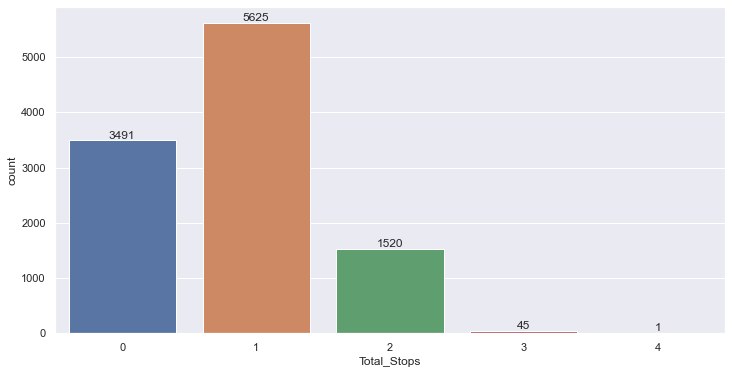

In [46]:
plt.figure(figsize= (12,6))
a = sns.countplot(df['Total_Stops'])

for i in a.containers:
    a.bar_label(i)
plt.show

In [47]:
# Max number of flights (= 5625) have only 1 stop in the journey

### Airlines with highest number of flights

<function matplotlib.pyplot.show(close=None, block=None)>

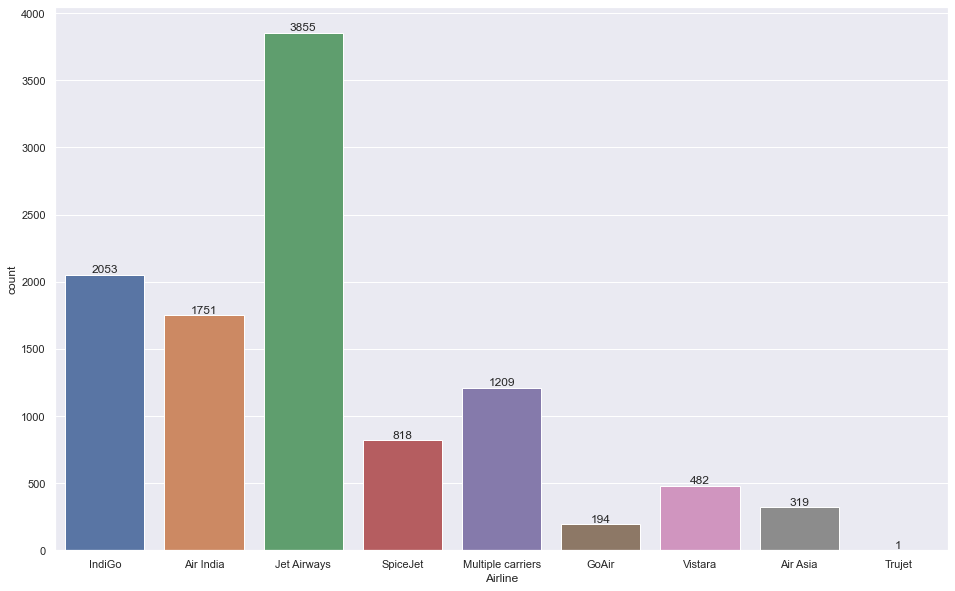

In [48]:
plt.figure(figsize= (16, 10))
a = sns.countplot(df['Airline'])

for i in a.containers:
    a.bar_label(i)

plt.show

In [49]:
# Jet Airways is the Airline with max number of flights (= 3855).

### Month with highest no. of flights

<function matplotlib.pyplot.show(close=None, block=None)>

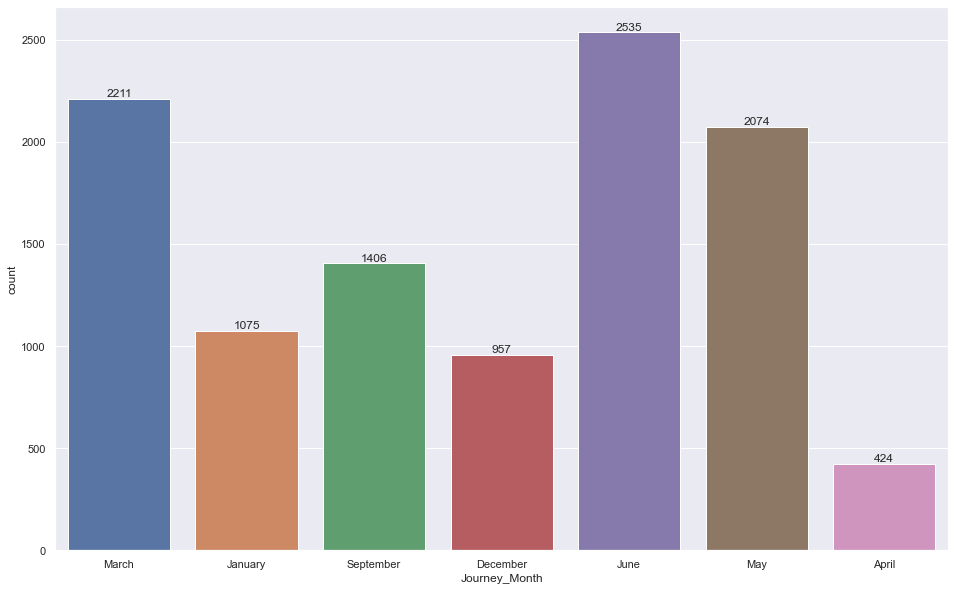

In [50]:
plt.figure(figsize= (16, 10))
a = sns.countplot(df['Journey_Month'])

for i in a.containers:
    a.bar_label(i)
plt.show

In [51]:
# Most of the passengers choose the month of June to travel. 
# June is the month with highest no. of flights (= 2535), followed by March and then May.

### Date & Days with highest no. of flights

<function matplotlib.pyplot.show(close=None, block=None)>

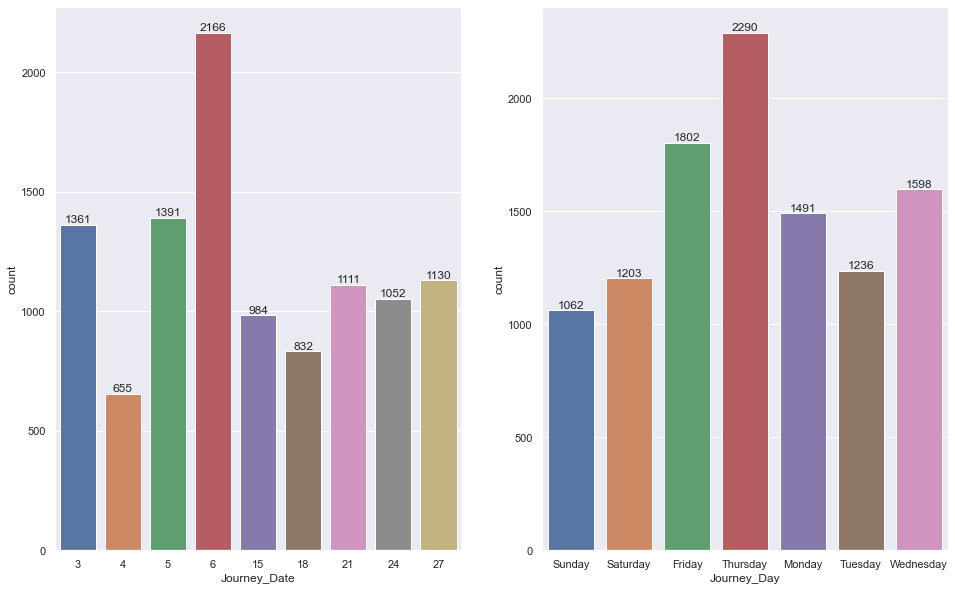

In [52]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
a = sns.countplot(data=df, x='Journey_Date')

for i in a.containers:
    a.bar_label(i)

plt.subplot(1,2,2)
b = sns.countplot(df['Journey_Day'])

for i in b.containers:
    b.bar_label(i)

plt.show

In [53]:
# Most of the passengers choose to travel in starting of the month, with 6th of any month being the date, when highest
# no. of flights are taking off.

# Mid of the week (Thursday) is the most preferred day of a week to travel for max no. of passengers.

###  Airlines ticket price

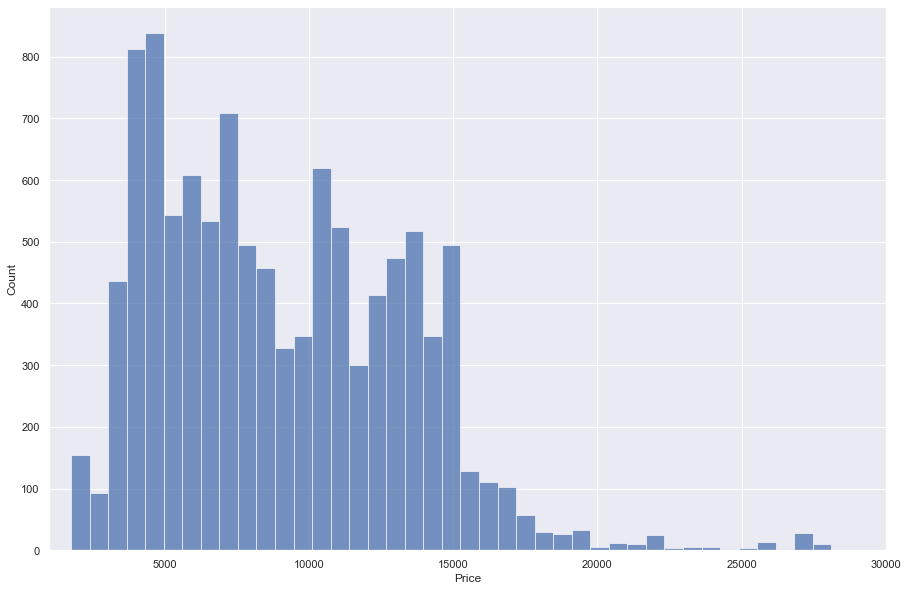

In [54]:
plt.figure(figsize=(15,10))
sns.histplot(df['Price'])

plt.xlim(1000,30000)
plt.show()

In [55]:
# Most frequest ticket Price offered by Airlines is slightly less than Rs. 5000.

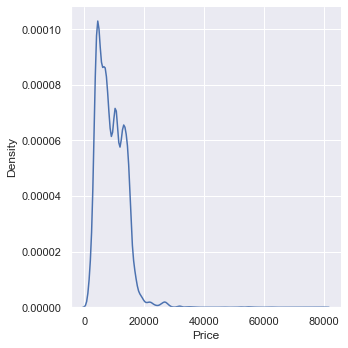

In [56]:
# Distributon Plot

sns.displot(df['Price'], kind= 'kde')

### Outliers detection

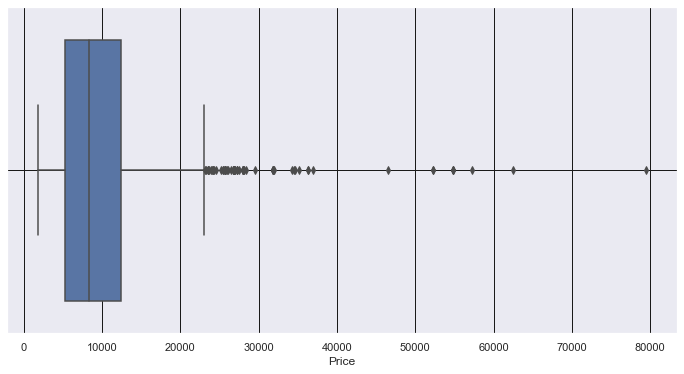

In [57]:
# Box Plot

plt.figure(figsize=(12,6))
sns.boxplot(df['Price'])

plt.grid(True, color= 'k')
plt.show()

In [59]:
df['Price'].quantile([0.25,0.5,0.75])

0.25     5277.0
0.50     8372.0
0.75    12373.0
Name: Price, dtype: float64

In [60]:
# IQR detection

IQR = df['Price'].quantile(.75) - df['Price'].quantile(0.25)
IQR

7096.0

In [61]:
# Getting Ul and LL for Flight Price Box Plot

[item.get_ydata()[0] for item in box_range['caps']]

[1759, 23001]

In [62]:
[item.get_ydata()[0] for item in box_range['medians']]

[8372.0]

In [63]:
[item.get_ydata()[0] for item in box_range['whiskers']]      # Whiskers are q1 and q3 values in box plot

[5277.0, 12373.0]

### Data in Outlier range

In [64]:
df[df['Price']> 12373][['Airline','Date_of_Journey','Source','Destination']]

,Airline,Date_of_Journey,Source,Destination
2,Jet Airways,2019-09-06,Delhi,Cochin
4,IndiGo,2019-01-03,Banglore,Delhi
7,Jet Airways,2019-01-03,Banglore,Delhi
15,Air India,2019-03-03,Delhi,Cochin
18,Air India,2019-12-06,Delhi,Cochin
...,...,...,...,...
10650,Jet Airways,2019-05-15,Kolkata,Banglore
10653,Jet Airways,2019-01-05,Kolkata,Banglore
10668,Jet Airways,2019-09-05,Delhi,Cochin
10673,Jet Airways,2019-05-27,Delhi,Cochin


### 2. Bivariate Analysis

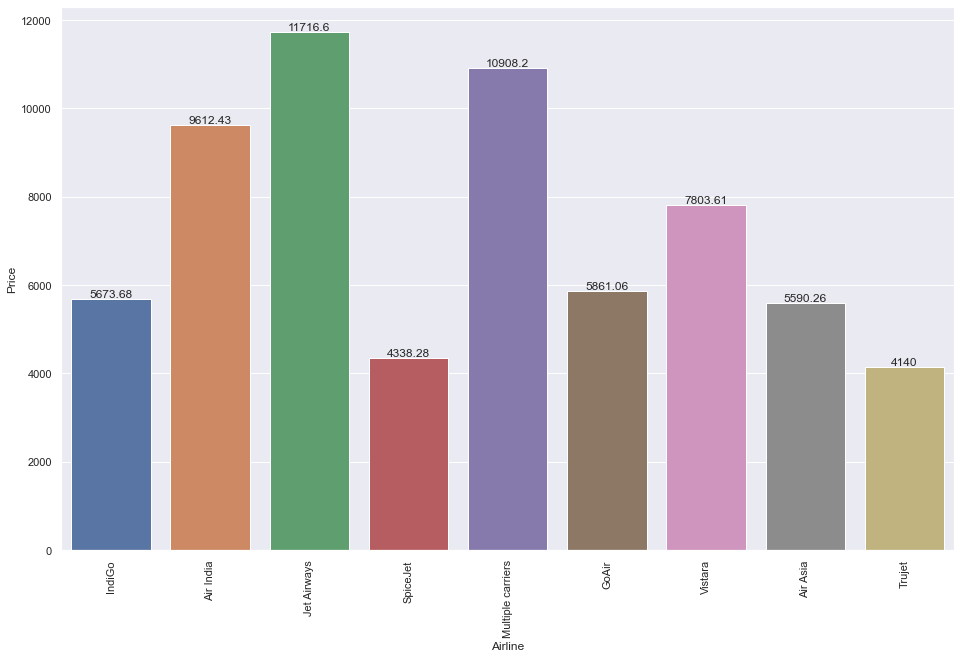

In [65]:
# Bar Plot

plt.figure(figsize=(16,10))
a = sns.barplot(x='Airline', y= 'Price', data= df, ci= None)
plt.xticks(rotation=90)

for i in a.containers:
    a.bar_label(i)
    
plt.show()

In [208]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,Banglore,Delhi,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,Kolkata,Banglore,7.416667,2,7662,1,Wednesday,May,18,5,50,13,15
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,9,Sunday,June,23,9,25,4,25
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,12,Sunday,May,19,18,5,23,30
4,IndiGo,Banglore,Delhi,4.750000,1,13302,1,Friday,March,9,16,50,21,35


In [209]:
df.Journey_Month.value_counts()

Journey_Month
May      3465
June     3414
March    2724
April    1079
Name: count, dtype: int64

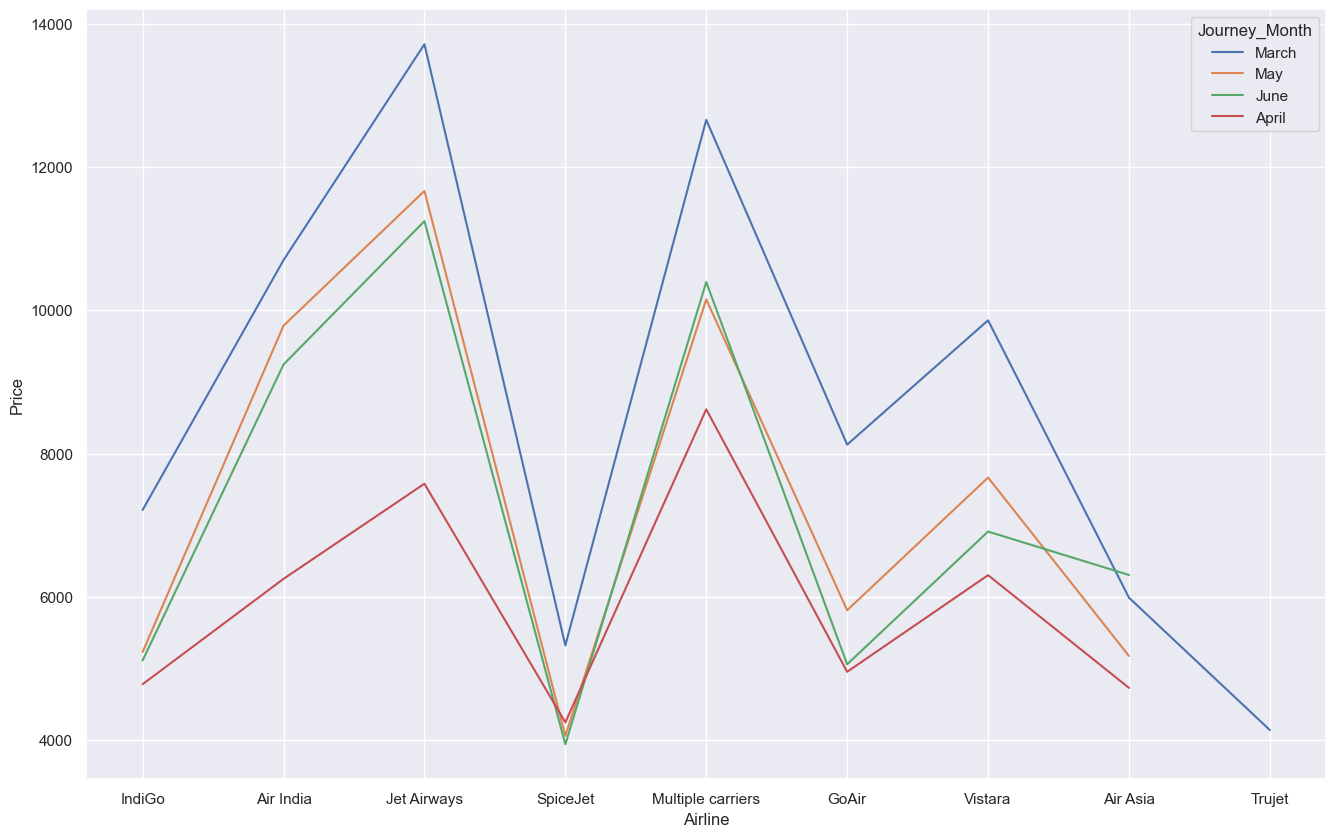

In [210]:
plt.figure(figsize= (16,10))
sns.lineplot(x='Airline', y='Price', data= df, ci= None, hue = 'Journey_Month') 

plt.show()

<Figure size 1600x1000 with 0 Axes>

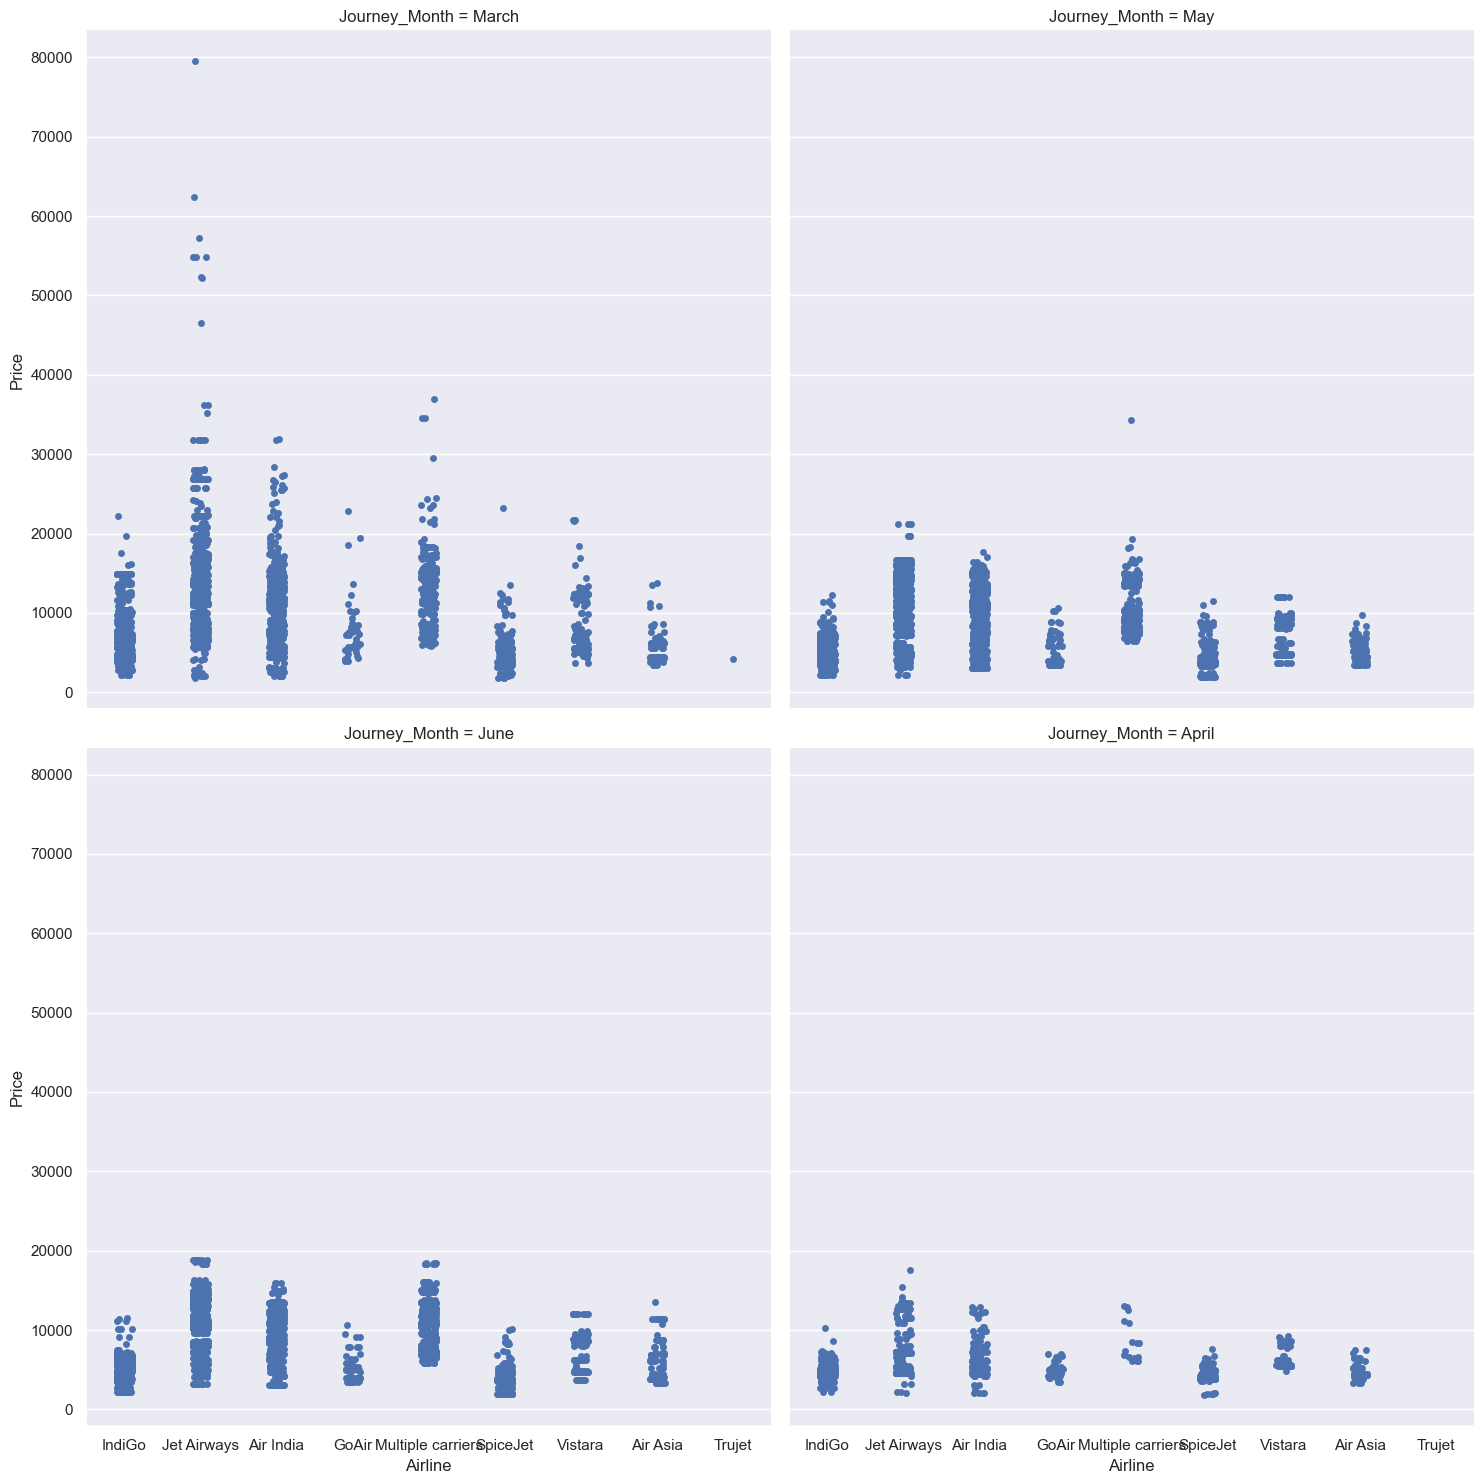

In [215]:
# Using FacetGrid

plt.figure(figsize= (16,10))
# Create a FacetGrid object
g = sns.FacetGrid(df, col="Journey_Month", col_wrap= 2, height= 7.5)

# Map a function to each facet
g.map(sns.stripplot, "Airline", "Price")

plt.show()

In [71]:
# Prices are generally higher in the month of January and lower in the month of April.

# Highest prices in the month of March are offered by - Jet Airways
# Highest prices in the month of April are offered by - Jet Airways
# Highest prices in the month of May are offered by - Multiple Carriers
# Highest prices in the month of June are offered by - Jet Airways

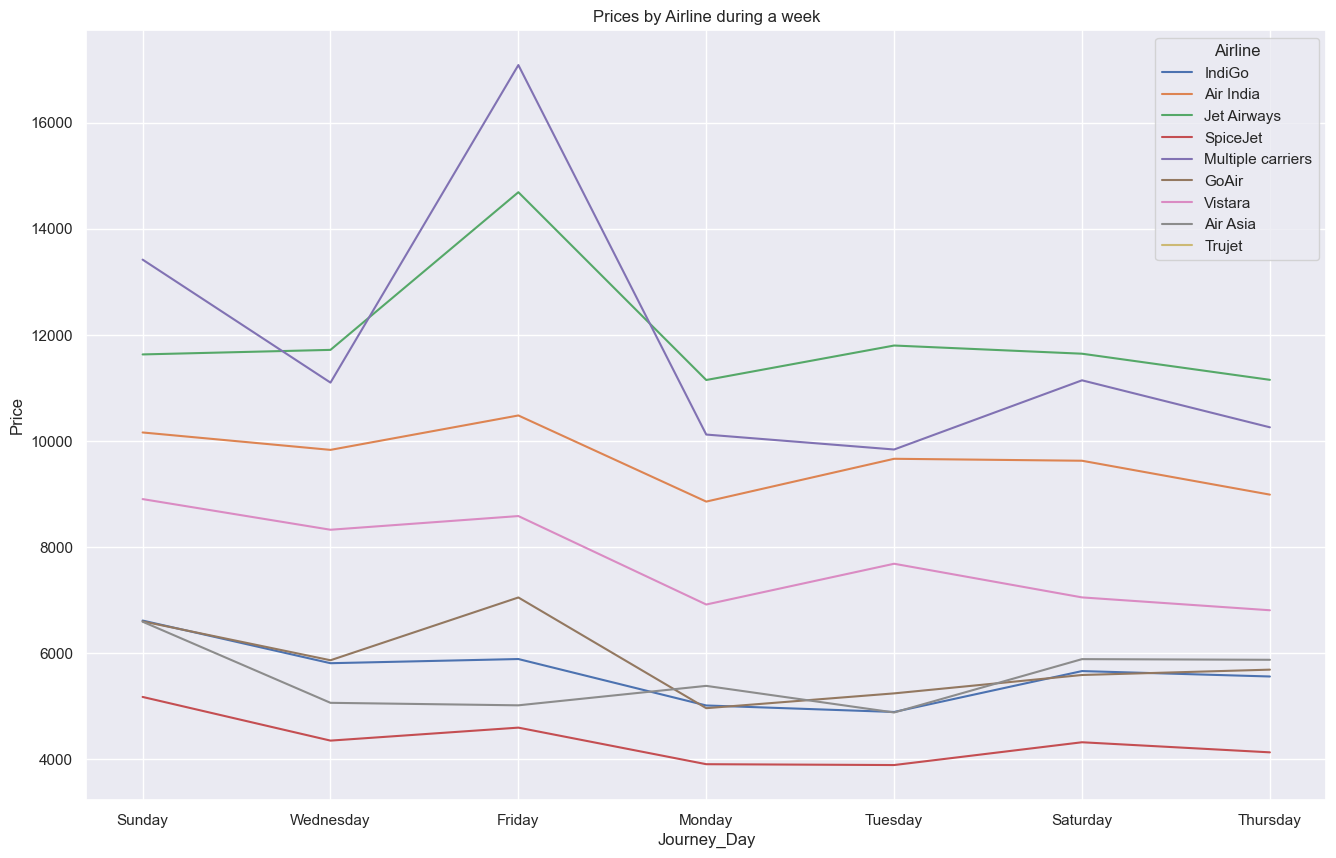

In [216]:
plt.figure(figsize = (16, 10))
sns.lineplot(x='Journey_Day', y='Price', data= df, ci=None, hue= 'Airline')

plt.title('Prices by Airline during a week')
plt.show()

In [73]:
# On Sunday -> offered prices are highest by "Multiple Carriers" and lowest by "Spice Jet" airlines respectively

# All the airlines offer maximum prices on Friday and minimum prices on either Monday or Tuesday.

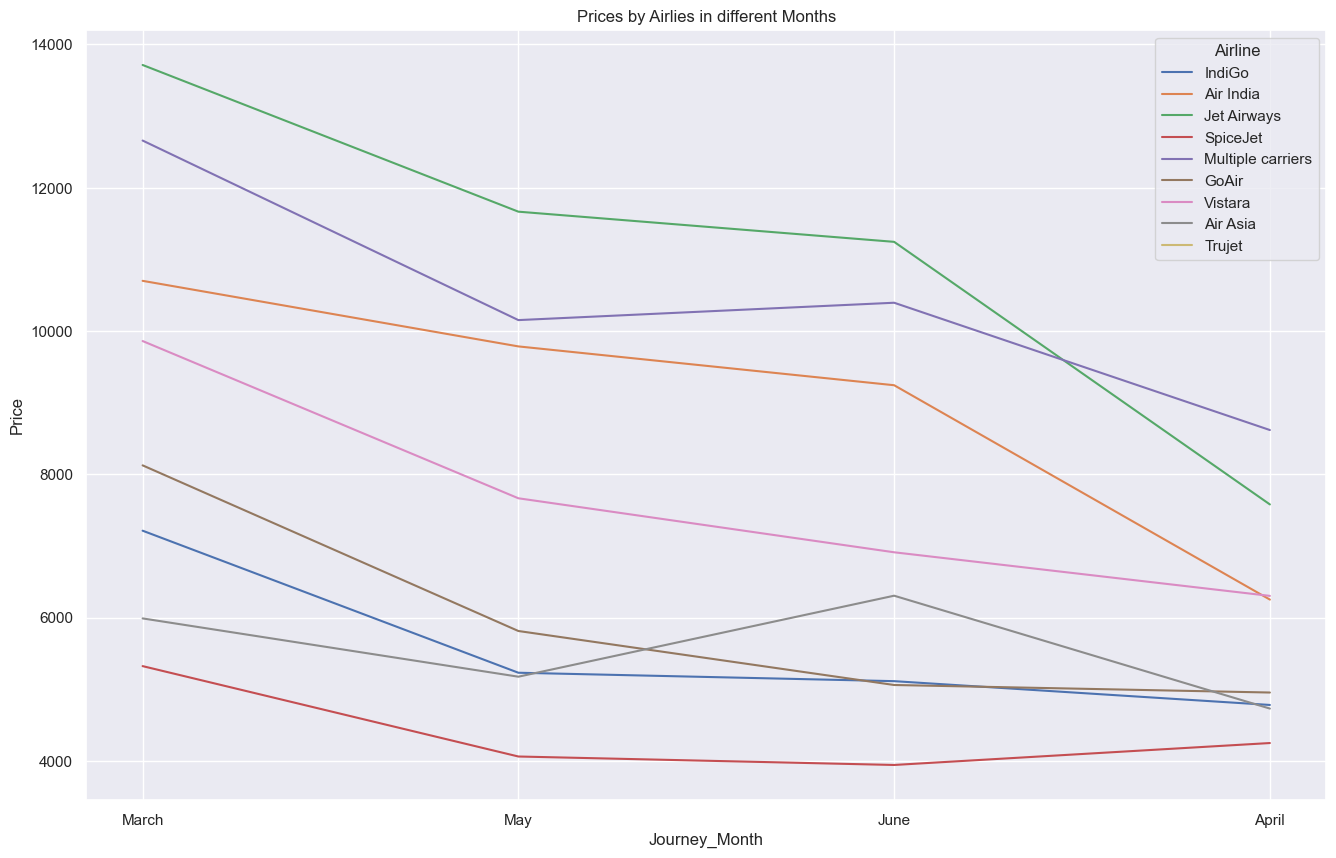

In [217]:
plt.figure(figsize = (16, 10))
sns.lineplot(x='Journey_Month', y='Price', data= df, ci=None, hue= 'Airline')

plt.title('Prices by Airlies in different Months')
plt.show()

In [218]:
# All the airlines offer their lowest prices in "April" and highest in "March"

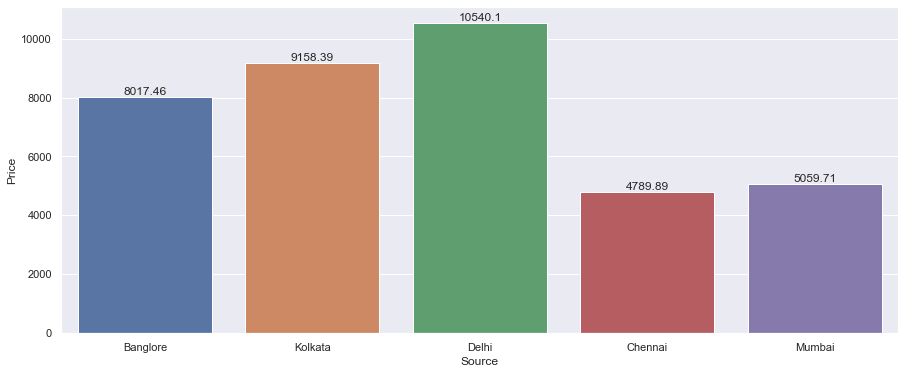

In [75]:
# Plotting Source & Destination vs Price

plt.figure(figsize=(15,6))

a = sns.barplot(x='Source', y='Price', data= df, ci= None)

for i in a.containers:
    a.bar_label(i)

plt.show()

<AxesSubplot:xlabel='Airline', ylabel='Total_Stops'>

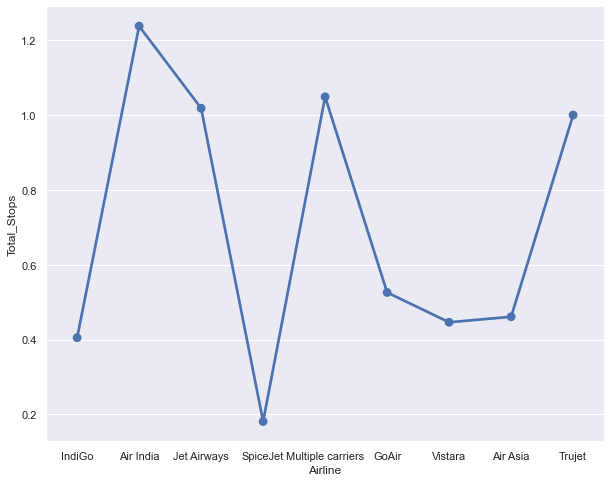

In [76]:
plt.figure(figsize = (10, 8))
sns.pointplot(x='Airline', y='Total_Stops', data= df, ci= None)

<AxesSubplot:xlabel='Airline', ylabel='Total_Stops'>

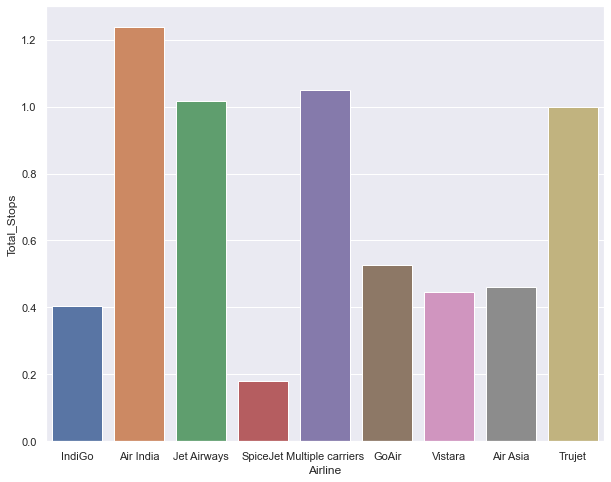

In [77]:
plt.figure(figsize = (10, 8))
sns.barplot(x='Airline', y='Total_Stops', data= df, ci= None)

In [78]:
# "Air India" flights have maximum number of stops in the journey and "Spice Jet" has least no. of stops

<Figure size 1440x720 with 0 Axes>

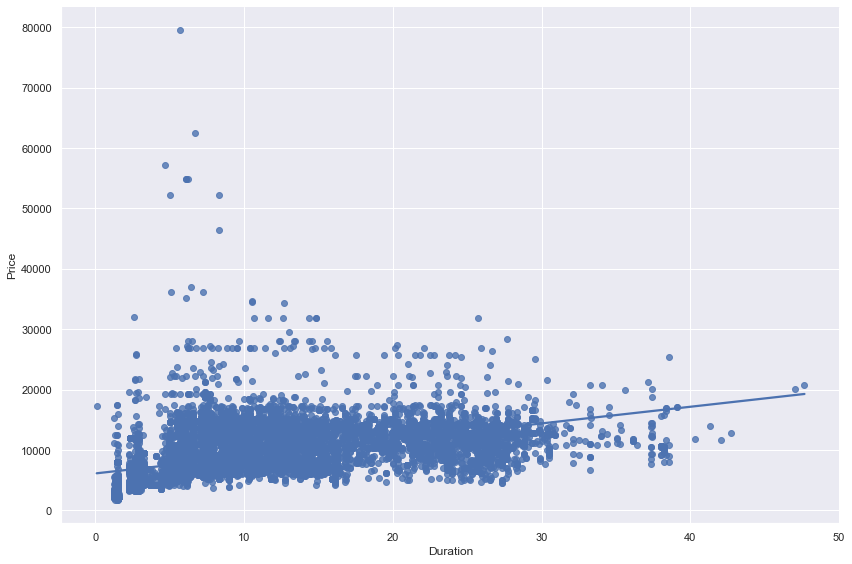

In [79]:
plt.figure(figsize=(20, 10))

sns.lmplot(x='Duration', y='Price', data= df, height = 8, aspect = 1.5, ci = None)

plt.show()

In [80]:
# Flights with less duration have higher prices

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration'>

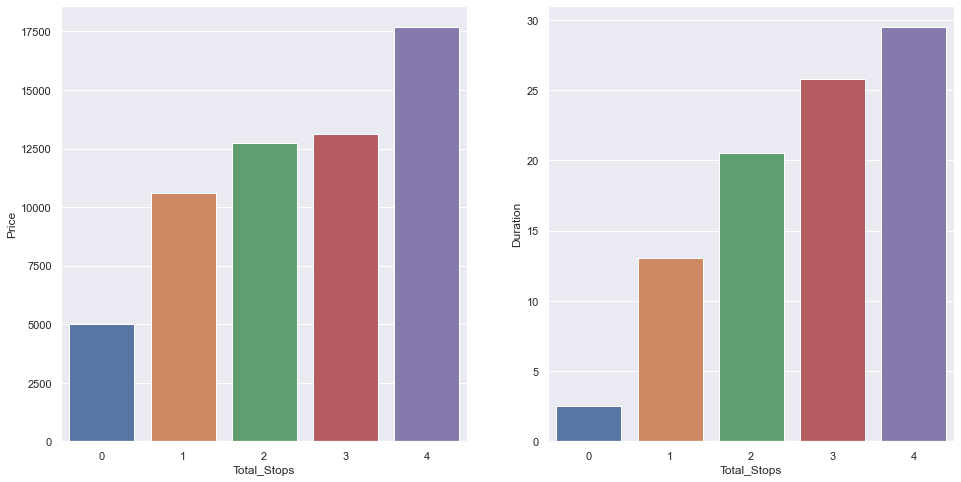

In [81]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(x='Total_Stops', y='Price', data= df, ci= None)

plt.subplot(1,2,2)
sns.barplot(x='Total_Stops', y='Duration', data= df, ci= None)

In [221]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,Banglore,Delhi,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,Kolkata,Banglore,7.416667,2,7662,1,Wednesday,May,18,5,50,13,15
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,9,Sunday,June,23,9,25,4,25
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,12,Sunday,May,19,18,5,23,30
4,IndiGo,Banglore,Delhi,4.750000,1,13302,1,Friday,March,9,16,50,21,35


In [222]:
df_num = df.select_dtypes(include = 'number')
df_num

,Duration,Total_Stops,Price,Journey_Date,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min
0,2.833333,0,3897,24,12,22,20,1,10
1,7.416667,2,7662,1,18,5,50,13,15
2,19.000000,2,13882,9,23,9,25,4,25
3,5.416667,1,6218,12,19,18,5,23,30
4,4.750000,1,13302,1,9,16,50,21,35
...,...,...,...,...,...,...,...,...,...
10677,2.500000,0,4107,9,15,19,55,22,25
10678,2.583333,0,4145,27,17,20,45,23,20
10679,3.000000,0,7229,27,17,8,20,11,20
10680,2.666667,0,12648,1,9,11,30,14,10


In [224]:
df1 =df_num.drop(['Dep_Time_hours', 'Dep_Time_min', 'Arrival_Time_hours', 'Arrival_Time_min'], axis= 1)
df1

,Duration,Total_Stops,Price,Journey_Date,Journey_Week
0,2.833333,0,3897,24,12
1,7.416667,2,7662,1,18
2,19.000000,2,13882,9,23
3,5.416667,1,6218,12,19
4,4.750000,1,13302,1,9
...,...,...,...,...,...
10677,2.500000,0,4107,9,15
10678,2.583333,0,4145,27,17
10679,3.000000,0,7229,27,17
10680,2.666667,0,12648,1,9


### 3. Multivariate Analysis

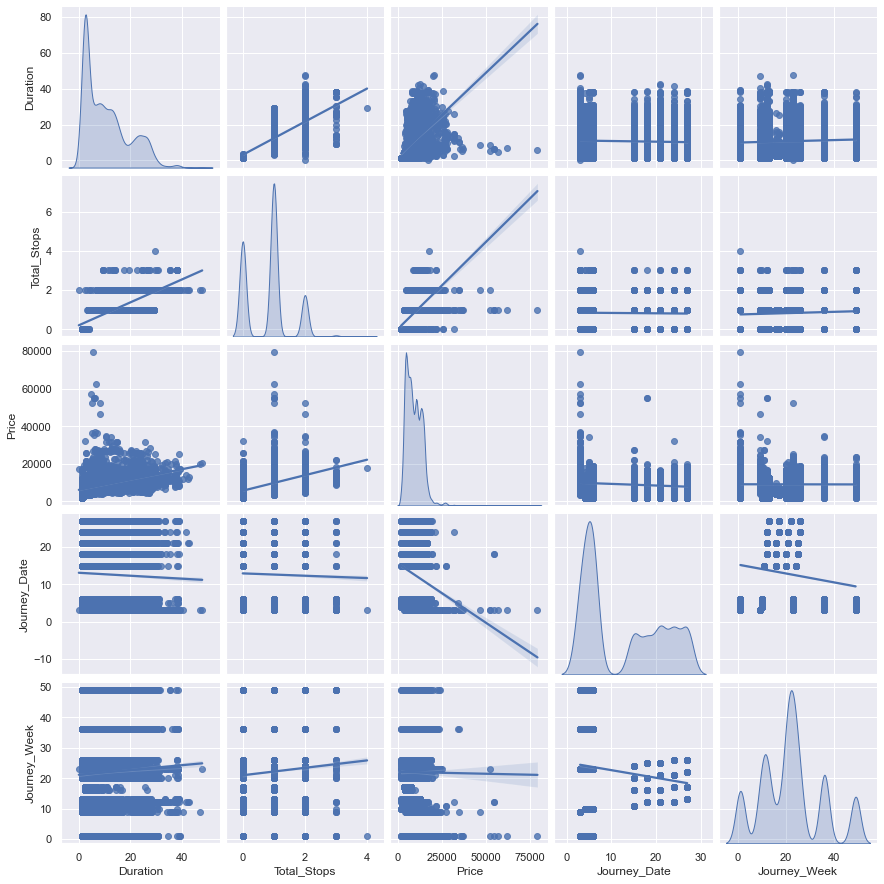

In [85]:
# Since scatter plot is not good for categorical col, but ONLY for Numerical columns, we considered df with Num col only.

sns.pairplot(df1, kind ='reg',diag_kind = 'kde')

## # CORRELATION AND HEATMAP

<Axes: >

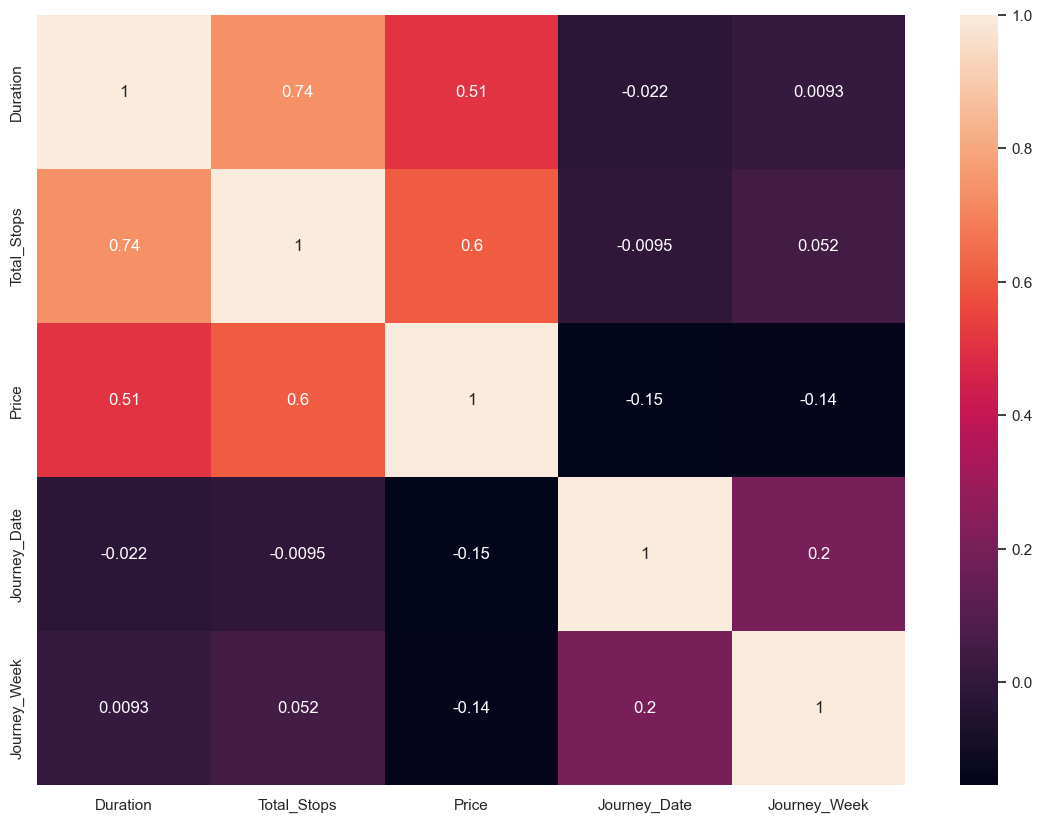

In [231]:
# Dateframe with ONLY Numerical data considered

plt.figure(figsize=(14, 10))

sns.heatmap(df1.corr(), annot = True)

In [232]:
# Since the value of correlation between any of the 2 independent variables is not >= 0.75, "multi-collinearity" does not exist.